# Bias-Variance Trade Off
#### Bias:
- Bias is the difference between average prediction and actual output label
$$Bias = \frac{1}{m}\sum_{i=0}^{m-1}[\mathbb{E}[\hat y] - y]$$

- Bias is the error cause by the overly simplistic assumptions
- For example, a linear model for a slightly parabolic dataset would definitely cause bias to be high
#### Variance:
- Variance is the sum of difference between the prediction and the average prediction
$$ Variance = \mathbb{E} [(\hat y - \mathbb{E}[\hat y])^2]$$
- Variance refers to the change by which the prediction would change if we estimate it using different data set.
- High variance causes the predction to change drastically even with a small change in training data
- Now it is intuitive to think that high variance causes overfitting.
- More flexible statistical methods will have high variance (think of a spline that passes through every data points in the training data set, i'll have maximum variance)
> A model with zero variance doesnot imply to best fit and could still have high bias if it consistently makes the same wrong prediction. The zero variance just refers that the model is consistant across the unseen data.

# Objective
The goal is to find a balance between bias and variance that minimizes the total error, which includes the irreducible error (noise in the data):

$$Total\ Error = Bias^2\ + Variance\ + Irreducible\ Error $$

- <b>High Bias and Low Variance:</b> The model is too simple, underfitting the data.

- <b>Low Bias and High Variance:</b> The model is too complex, overfitting the data.

- <b>Optimal Model:</b> The model finds a sweet spot where both bias and variance are balanced, resulting in the lowest possible total error.

#### Good vs Bad  performing Model
- A good performing model will have less errors as model complexity increases
- Model complexity refers to the degree of polynomial (in polynomial regression, not in all cases)
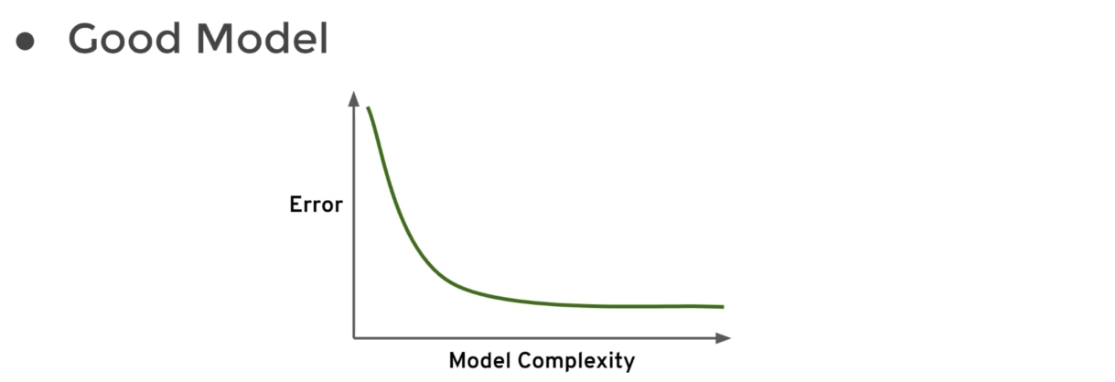
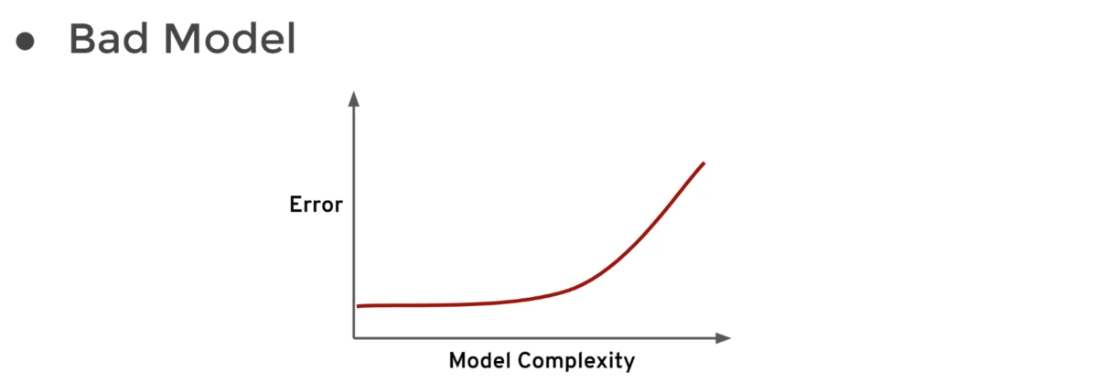

# Error vs Model complexity plot (for test and train data)
- An error vs model complexity shoud be compared with train and test data
- It should have low errors in test set than on train set
- As the model complexity increases, the test data may overshoot at certain point and is called as cut-off point
- And we shoud set the complexity less than the cutoff point
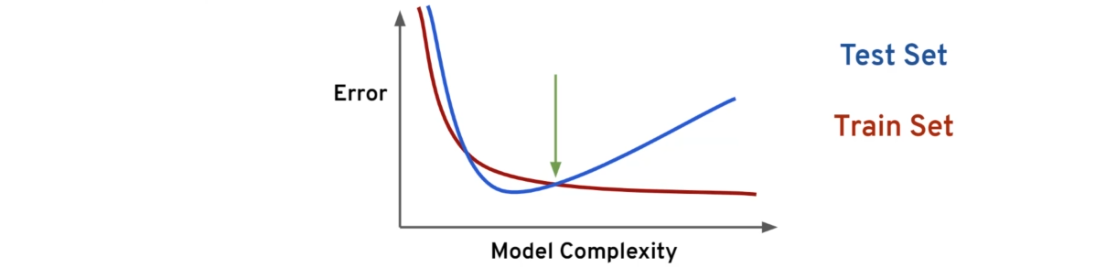

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Advertising.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [3]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
test_rmse = []
train_rmse = []
for d in range(1,10):
    # converting to polynomial of d degree
    poly_convert = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_convert.fit_transform(X)

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # fitting a model
    model = LinearRegression()
    model.fit(X_train, y_train)

    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)

    # calculating and storing root mean squared error
    rmse_train = np.sqrt(((y_train - train_prediction)**2).mean())
    rmse_test = np.sqrt(((y_test - test_prediction)**2).mean())
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)
    

In [6]:
train_rmse

[np.float64(1.734594124329376),
 np.float64(0.587957408529223),
 np.float64(0.4339344356902067),
 np.float64(0.3517083688399352),
 np.float64(0.25093430240186493),
 np.float64(0.2064045546709168),
 np.float64(5.421426194512566),
 np.float64(0.14557121216378469),
 np.float64(0.1722216918620683)]

In [7]:
test_rmse

[np.float64(1.5161519375993877),
 np.float64(0.6646431757269089),
 np.float64(0.5803286825242431),
 np.float64(0.5077742639736941),
 np.float64(2.5758252309086074),
 np.float64(4.313638228802707),
 np.float64(1379.5910714942029),
 np.float64(3931.4854230135807),
 np.float64(95549.19186409056)]

Text(0, 0.5, 'RMSE')

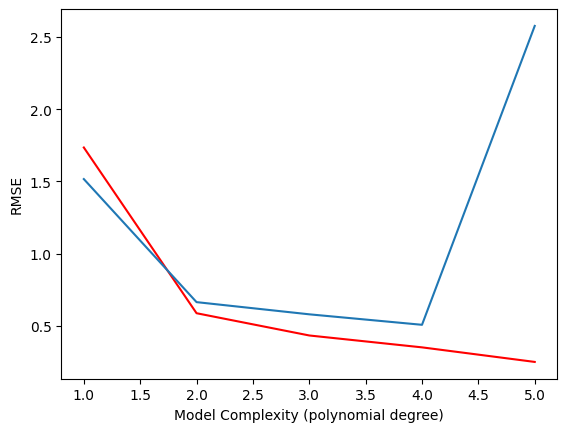

In [8]:
# Model complexity vs Error plot
plt.plot(range(1,6), train_rmse[:5], c ='red')
plt.plot(range(1,6), test_rmse[:5])
plt.xlabel('Model Complexity (polynomial degree)')
plt.ylabel('RMSE')

- From the RMSE vs Model Complexity plot, it is appropriae to choose the polynomial degree of 3 (in the context).
- The cutoff point is at 4th degree which we generally exclude as a safety purpose
- The model of degree 3 provides test_RMSE of 0.58 and train_RMSE of 0.433
- which seems slightly overfitting (if not seen graph) but is worthy to consider the model as appropriate for unseen data.

In [9]:
poly_convert = PolynomialFeatures(degree = 3, include_bias = False)
poly_features = poly_convert.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# fitting a model
model = LinearRegression()
model.fit(X_train, y_train)

train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

test_residuals = y_test - test_prediction

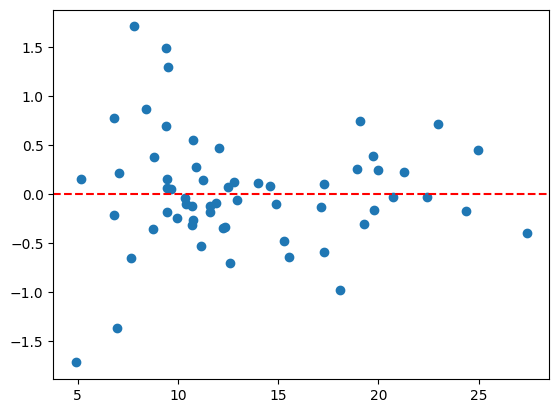

In [10]:
# prediction vs redisual plot (should not form any pattern such as linear, parabolic, funnel etc.)
plt.scatter(x = test_prediction, y = test_residuals)
plt.axhline(y=0, ls='--', c='red')

In [11]:
import seaborn as sns

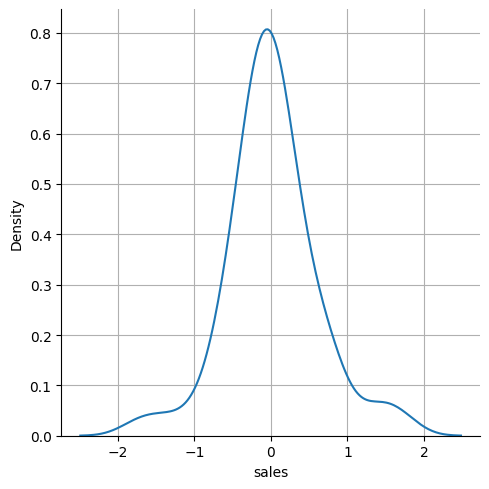

In [12]:
# distribution plot for test_residual (which should be normally distributed)
sns.displot(x= test_residuals, kind='kde');
plt.grid()

## Conclusion
- All the plots: `model complexity vs error`, `residual plot (test_prediction vs residual)` and `distribution plot` concludes the model selection is correct with polynomial degree 3.

# Model Deployment
- Now, finally model is decided
- We can train the model with all the data without split and deploy the model


In [13]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias = False)
features = final_poly_converter.fit_transform(X)

In [14]:
final_model = LinearRegression()
final_model.fit(features,y)

LinearRegression()

In [15]:
from joblib import dump, load

In [16]:
dump(final_model, 'poly_model_advertising.joblib')
dump(final_poly_converter, 'poly_converter_advertising.joblib')

['poly_converter_advertising.joblib']

In [17]:
loaded_converter = load('poly_converter_advertising.joblib')
loaded_model = load('poly_model_advertising.joblib')

In [18]:
campaign = [[100,200,50]]
campaign_converted_data = loaded_converter.fit_transform(campaign)

In [19]:
loaded_model.predict(campaign_converted_data)

array([59.5452747])

# Comparision with linear model
- For the same campaign, the linear model had the sales of 45.118
- but the polynomial model (3rd degree) has the sales prediction of 59.54
- From this we it is known that the linear model was a bit more biased in comparison. 

In [20]:
r2_score(test_prediction, y_test)

0.987934400841544

In [21]:
loaded_model.coef_

array([ 8.96744296e-02,  3.87306507e-02,  1.40116785e-02, -4.39852533e-04,
        1.38525353e-03, -2.11551525e-04, -5.78622015e-04, -3.39038010e-04,
        2.30693236e-04,  7.62775843e-07, -1.21636828e-06,  7.24494002e-07,
        1.79932497e-06, -1.51021227e-06, -1.14841391e-07,  3.32749144e-06,
        4.93904244e-06,  2.67349509e-06, -2.30514930e-06])